# Adam Czarnowski
# Algorytm wizualizacji wielowymiarowych danych w przestrzeni dwuwymiarowej z użyciem sieci Kohonena na przykładzie danych Irys.

# 1. Wstęp

Na potrzeby zadania stworzony został program w języku Python, który posłuży za podstawę opisu zadanego problemu - zbiorem danych jest zbiór Irys. Program generuje mapę danych o wymiarze 30x30, gdzie każda z komórek/wierzchołków zawiera wektor danych opisujących kwiat np. 5.5, 2.9, 3.6, 1.8, również zawiera informację o geometrycznej odległości danych od siebie. 

# 2. Opis Algorytmu

###### Krok 1:
Inicjalizacja wagi dla każdego wierzchołka.
###### Krok 2:
Wybór dowolnego wektora wejściowego.
###### Krok 3:
Powtarzaj krok 4 oraz 5 dla wszystkich wierzchołków mapy.
###### Krok 4:
Obliczanie odległości euklidesowej pomiędzy wektorami wag i wektorem wejściowym.
###### Krok 5:
Śledź wierzchołek, który wygenerował najmniejszą odległość euklidesową.
###### Krok 6:
Oblicz najmniejszy dystans spośród wszystkich dystansów. (ang. BMU - Best Matching Unit)
###### Krok 7:
Relacja sąsiedztwa i tworzenie sieci topologicznej.
###### Krok 8:
Aktualizacja wag wektora dla pierwszego wierzchołka w sąsiedztwie.
###### Krok 9:
Powtarzanie iteracji, aż do osiągnięcia zadanej wartości iteracji.

# 3. Kod programu

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def closest_node(data, t, map, m_rows, m_cols):
  result = (0,0)
  small_dist = 1.0e20
  for i in range(m_rows):
    for j in range(m_cols):
      ed = euc_dist(map[i][j], data[t])
      if ed < small_dist:
        small_dist = ed
        result = (i, j)
  return result

def euc_dist(v1, v2):
  return np.linalg.norm(v1 - v2) 

def manhattan_dist(r1, c1, r2, c2):
  return np.abs(r1-r2) + np.abs(c1-c2)

def most_common(lst, n):
  if len(lst) == 0: return -1
  counts = np.zeros(shape=n, dtype=int)
  for i in range(len(lst)):
    counts[lst[i]] += 1
  return np.argmax(counts)

### 3.1 Funkcja closest_node()
Zwraca indeksy wierszy i kolumn w SOM z rozmiarem m_rows x m_cols, które są koordynatami komórki mapy, dla której wektor jest najbliżej elementu zbioru danych w data[t]. Komórka wektora, która jest najbliższa elementowi zbioru Irys nazywana jest BMU (ang. Best Matching Unit).
### 3.2 Funkcja euc_dist()
Zwraca euklidesową odległość pomiędzy dwoma wektorami. Przykładowo dla wektorów v1 = (2, 1, 4) oraz v2 = (5, 1, 8) funkcja ta wykona operację sqrt((5-2)^2 + (1-1)^2 + (8-4)^2) = sqrt(25) = 5.0
### 3.3 Funkcja manhattan_dist()
Zwraca odległość przy użyciu koordynatów dwóch komórek. Przykładowo dla koordynatów (r1 = 2, c1 = 5) oraz (r2 = 6, c2 = 8) odległość będzie wynosić |4-2| + |8-5| = 4 + 3 = 7.
### 3.4 Funkcja most_common()
Zwraca najczęstszą wartość w liście liczb całkowitych.

In [3]:
def main():
  np.random.seed(1)
  Dim = 4
  Rows = 30; Cols = 30
  RangeMax = Rows + Cols
  LearnMax = 0.5
  StepsMax = 5000

  print("\nŁadowanie danych Irys \n")
  data_file = ".\\iris_data_012.txt"
  data_x = np.loadtxt(data_file, delimiter=",", usecols=range(0,4),
    dtype=np.float64)
  data_y = np.loadtxt(data_file, delimiter=",", usecols=[4],
    dtype=int)
    
  print("Tworzenie SOM 30x30 ze zbioru danych Irys")
# PRZYPIS 1
  map = np.random.random_sample(size=(Rows,Cols,Dim))

# PRZYPIS 2
  for s in range(StepsMax):
    if s % (StepsMax/10) == 0: print("step = ", str(s))
    pct_left = 1.0 - ((s * 1.0) / StepsMax)
    curr_range = int(pct_left * RangeMax)
    curr_rate = pct_left * LearnMax

# PRZYPIS 3
    t = np.random.randint(len(data_x))
    (bmu_row, bmu_col) = closest_node(data_x, t, map, Rows, Cols)
    for i in range(Rows):
      for j in range(Cols):
        if manhattan_dist(bmu_row, bmu_col, i, j) < curr_range:
          map[i][j] = map[i][j] + curr_rate * \
(data_x[t] - map[i][j])
  print("Tworzenie SOM powiodło się \n")

# PRZYPIS 4
  print("Tworzenie UMatrix z SOM")
  u_matrix = np.zeros(shape=(Rows,Cols), dtype=np.float64)
  for i in range(Rows):
    for j in range(Cols):
      v = map[i][j]
      sum_dists = 0.0; ct = 0

# PRZYPIS 5
      if i-1 >= 0:
        sum_dists += euc_dist(v, map[i-1][j]); ct += 1
      if i+1 <= Rows-1:
        sum_dists += euc_dist(v, map[i+1][j]); ct += 1
      if j-1 >= 0:
        sum_dists += euc_dist(v, map[i][j-1]); ct += 1
      if j+1 <= Cols-1:
        sum_dists += euc_dist(v, map[i][j+1]); ct += 1
      
      u_matrix[i][j] = sum_dists / ct 


  plt.imshow(u_matrix, cmap='gray')
  plt.show()
  print("Tworzenie UMatrix powiodło się\n")


# PRZYPIS 6
  print("Łączenie każdego gatunku zbioru danych w jedną mapę wierzchołków")
  mapping = np.empty(shape=(Rows,Cols), dtype=object)
  for i in range(Rows):
    for j in range(Cols):
      mapping[i][j] = []

# PRZYPIS 7
  for t in range(len(data_x)):
    (m_row, m_col) = closest_node(data_x, t, map, Rows, Cols)
    mapping[m_row][m_col].append(data_y[t])

# PRZYPIS 8
  label_map = np.zeros(shape=(Rows,Cols), dtype=int)
  for i in range(Rows):
    for j in range(Cols):
      label_map[i][j] = most_common(mapping[i][j], 3)
 
  plt.imshow(label_map, cmap=plt.cm.get_cmap('terrain_r', 4))
  plt.colorbar()
  plt.show()
  print("Łączenie powiodło się")

### 3.5 Tworzenie SOM
Wywołanie funkcji random_sample() tworzy macierz 30x30, gdzie każda z komórek jest wektorem o rozmiarze 4 z losowymi wartościami z przedziału od 0.0 do 1.0. [PRZYPIS 1]
Zmienna pct_left oblicza procentową wartość pozostałych kroków iteracji. Zmienna curr_range jest maksymalną odległością koordynatów dla kroku s. [PRZYPIS 2]
Zostaje wybrana losowa dana i na jej podstawie wybierany jest najbardziej pasujący wierzchołek/komórka. [PRZYPIS 3]
### 3.6 Tworzenie UMatrix (ang. unified distance matrix method)
Każda z komórek trzyma wektor o wartości odnoszącej się do jednego lub więcej elementów zbioru danych. Początkowo wartość każdej wynosi 0.0, następnie UMatrix jest przetwarzany. [PRZYPIS 4]
Wektor v jest wektorem w SOM odpowiadający obecnej komórki UMatrix. Każda z sąsiednich komórek w SOM jest przetwarzana i obliczana jest suma dystansów euklidesowych. [PRZYPIS 5]
### 3.7 Użycie SOM dla redukcji wizualizacji wymiarowości 
Każda z komórek przechowuje pustą listę. [PRZYPIS 6]
Następnie każda z komórek jest przetwarzana w zależności od klasy (w tym przypadku gatunki o wartościach 0, 1, 2) i dodawana do listy komórki. [PRZYPIS 7]
Kolejnym etapem jest pobranie najczęściej powtarzanej klasy z lisy i dodanie jej do macierzy label_map. [PRZYPIS 8]


Ładowanie danych Irys 

Tworzenie SOM 30x30 ze zbioru danych Irys
step =  0
step =  500
step =  1000
step =  1500
step =  2000
step =  2500
step =  3000
step =  3500
step =  4000
step =  4500
Tworzenie SOM powiodło się 

Tworzenie UMatrix z SOM


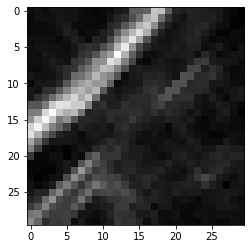

Tworzenie UMatrix powiodło się

Łączenie każdego gatunku zbioru danych w jedną mapę wierzchołków


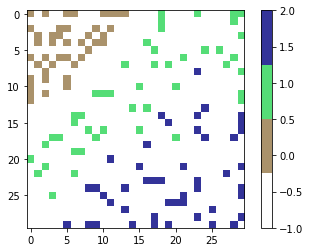

Łączenie powiodło się


In [4]:
if __name__=="__main__":
  main()